<a href="https://colab.research.google.com/github/IkramMaouche/CS-CatBoost/blob/main/Breast_Cancer_Metastasis_Prediction_using_CS_CatBoot_and_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas=="1.3.3"

In [ ]:
pip install openpyxl=="3.0.9"

# Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#print(pd.__version__)

df = pd.read_excel("Database_Slaoui_Meriem_2.xlsx", index_col=0, na_values=['', 'unknown'])
# Preview the first 5 lines of the loaded data 
#print(df.shape)
#print the column names
#print(df.columns)

df['Number of full term pregnancies'] = df['Number of full term pregnancies'].replace(0,'zero')
df['Number of full term pregnancies'] = df['Number of full term pregnancies'].replace(1,'one')

# Delete  columns with issing values > 80%
df.drop(['Metastatic disease'], axis='columns', inplace=True)

# Delete rows where OUTCOME is unknown 
df.dropna(subset = ['progression'], inplace=True)
#print("drop progression ",df.shape)

df = df[df.Obesity.isnull() & df['Familial history of breast cancer'].isnull() & df.progression == 0]
#print(df.shape)

df.to_csv('dfRaw.csv', index = False)

#convert data using dictionary
d = [{'≤40y': 0, '˃40y': 1},
     {'no': 0, 'yes': 1},
     {'zero': 0, 'one': 1, '2 to 4' : 2, '5 or more' : 3},
     {'negative': 0, 'positive': 1},
     {'T1': 0, 'T2': 1, 'T3': 2},
     {'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3},

     {'sarcoma': 0, 'tubular carcinoma': 1, 'invasive carcinoma of no special type': 2,
     'carcinoma with medullary features': 3, 'Invasive papillary carcinoma': 4,
     'invasive lobular carcinoma': 5, 'Ductal carcinoma in situ': 6,
     'angiosarcoma': 7, 'invasive mucinous carcinoma': 8,
     'inflammatory carcinoma': 9, 'metaplastic carcinoma of NST': 10,
     'carcinoma with neuroendocrine features': 11, 'Mixed invasive NST and special type': 12},
     
     {'SBR I': 0, 'SBR II': 1, 'SBR III': 2},

     {'conservative' : 0, 'radical mastectomy' : 1},
     
     {'no' : 0, 'metastasis/relapse' : 1}]

df['Age']= df['Age'].map(d[0]).fillna(df['Age'])
df['Nulliparity']= df['Nulliparity'].map(d[1]).fillna(df['Nulliparity'])
df['Oral contraception use']= df['Oral contraception use'].map(d[1]).fillna(df['Oral contraception use'])
df['Menopause']= df['Menopause'].map(d[1]).fillna(df['Menopause'])
df['Familial history of breast cancer']= df['Familial history of breast cancer'].map(d[1]).fillna(df['Familial history of breast cancer'])
df['Number of full term pregnancies']= df['Number of full term pregnancies'].map(d[2]).fillna(df['Number of full term pregnancies'])
df['Obesity']= df['Obesity'].map(d[1]).fillna(df['Obesity'])
df['ER']= df['ER'].map(d[3]).fillna(df['ER'])
df['PR']= df['PR'].map(d[3]).fillna(df['PR'])
df['HER2']= df['HER2'].map(d[3]).fillna(df['HER2'])
df['Tumor size']= df['Tumor size'].map(d[4]).fillna(df['Tumor size'])
df['Lymph nodes']= df['Lymph nodes'].map(d[5]).fillna(df['Lymph nodes'])
df['Histological type']= df['Histological type'].map(d[6]).fillna(df['Histological type'])
df['Vascular invasion']= df['Vascular invasion'].map(d[1]).fillna(df['Vascular invasion'])
df['SBR grade']= df['SBR grade'].map(d[7]).fillna(df['SBR grade'])
df['Surgery type']= df['Surgery type'].map(d[8]).fillna(df['Surgery type'])
df['Adjuvant Chemotherapy']= df['Adjuvant Chemotherapy'].map(d[1]).fillna(df['Adjuvant Chemotherapy'])
df['Radiotherapy']= df['Radiotherapy'].map(d[1]).fillna(df['Radiotherapy'])
df['Trastuzumab']= df['Trastuzumab'].map(d[1]).fillna(df['Trastuzumab'])
df['Hormone Therapy']= df['Hormone Therapy'].map(d[1]).fillna(df['Hormone Therapy'])
df['progression']= df['progression'].map(d[9]).fillna(df['progression'])

"""
#Count missing values for each column of the dataframe df
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#print(missing_value_df)
"""

#df.to_csv('df.csv', index = False)

#Imputation

In [ ]:
pip install missingpy

In [ ]:
pip install scikit-learn==0.22

In [ ]:
from missingpy import MissForest
import pandas as pd

df = pd.read_csv('df.csv')

# get indices of categorical features
cat_cols_ind = [df.columns.get_loc(col) for col in df.columns.tolist()]
cat_cols_ind.pop()

# Make an instance and perform the imputation
imputer = MissForest()

df_imputed = imputer.fit_transform(df, cat_vars=cat_cols_ind)

df = pd.DataFrame(df_imputed, columns= list(df.columns.values))
#dfNew = dfNew.drop('progression', axis=1)

for col in cat_cols_ind:
    df.iloc[:,col] = df.iloc[:,col].astype('category')

#df.to_csv('dfImputed.csv', index = False)

Iteration: 0
Iteration: 1
Iteration: 2


# Undersampling

In [ ]:
import pandas as pd
df = pd.read_csv('dfImputed.csv')

Y = pd.DataFrame(df['progression'], columns = ['progression'])
X = df.drop(['progression'], axis='columns', inplace=False)

In [ ]:
pip install scikit-learn==0.23

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)#, stratify=Y

X_train = pd.DataFrame(X_train, columns= list(X.columns.values))
X_test = pd.DataFrame(X_test, columns= list(X.columns.values))
y_train = pd.DataFrame(y_train, columns= ['progression'])
y_test = pd.DataFrame(y_test, columns= ['progression'])

#---------------------------------------------------  Solve the UNBALANCED DATA problem  -------------------------------------------------
from collections import Counter


# summarize distribution
counter = Counter(y_train['progression'].values.tolist())
print(counter)

from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=4) #, ratio='majority', return_indices=False
X_train, y_train = enn.fit_resample(X_train, y_train)

# summarize distribution
counter = Counter(y_train['progression'].values.tolist())
print(counter)
#-----------------------------------------------------------------------------------------------------------------------------------------
"""
X_train.to_csv("X_train1.csv", index = False)
y_train.to_csv("y_train1.csv", index = False)
X_test.to_csv("X_test1.csv", index = False)
y_test.to_csv("y_test1.csv", index = False)
"""

# Fature selection

In [ ]:
import pandas as pd
X_train = pd.read_csv("X_train1.csv")
y_train = pd.read_csv("y_train1.csv")
X_test  = pd.read_csv("X_test1.csv")
y_test  = pd.read_csv("y_test1.csv")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 5.2 MB/s 


In [ ]:
import random
from pandas import read_csv
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score


class Patient:
    """This class encapsulates the Friedman1 test for a regressor
    """

    NUM_FOLDS = 5

    def __init__(self, randomSeed):
        """
        :param randomSeed: random seed value used for reproducible results
        """
        self.randomSeed = randomSeed

        # separate to input features and resulting category (last column):
        self.X = X_train
        self.y = y_train

        # split the data, creating a group of training/validation sets to be used in the k-fold validation process:
        self.kfold = model_selection.KFold(n_splits=self.NUM_FOLDS)

        self.classifier = RandomForestClassifier(random_state=self.randomSeed)

    def __len__(self):
        """
        :return: the total number of features used in this classification problem
        """
        return self.X.shape[1]

    def getMeanF1score(self, zeroOneList):
        """
        returns the mean F1-score measure of the calssifier, calculated using k-fold validation process,
        using the features selected by the zeroOneList
        :param zeroOneList: a list of binary values corresponding the features in the dataset. A value of '1'
        represents selecting the corresponding feature, while a value of '0' means that the feature is dropped.
        :return: the mean F1-score measure of the calssifier when using the features selected by the zeroOneList
        """

        # drop the dataset columns that correspond to the unselected features:
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis=1)

        # perform k-fold validation and determine the f1score measure of the classifier:
        cv_results = model_selection.cross_val_score(self.classifier, currentX, self.y, cv=self.kfold, scoring='f1')

        #gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='weighted')

        # perform k-fold validation and determine the f1score measure of the classifier:
        #cv_results = model_selection.cross_val_score(self.classifier, currentX, self.y, cv=self.kfold, scoring=gm_scorer)

        # return mean f1score:
        return cv_results.mean()

# testing the class:
def main():
    # create a problem instance:
    patient = Patient(randomSeed=42)

    allOnes = [1] * len(patient)
    print("-- All features selected: ", allOnes, ", F1 score = ", patient.getMeanF1score(allOnes))

if __name__ == "__main__":
    main()

-- All features selected:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , F1 score =  0.26959247648902823


In [ ]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        #print(offspring)

        
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [ ]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.05   # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 10

TREAT_PENALTY_FACTOR = 0.003
FEATURE_PENALTY_FACTOR = 0.001

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the Patient test class:
patient = Patient(RANDOM_SEED)

def randomm():
  list=[]
  for i in range(len(patient)-4):
    list.append(random.randint(0,1))

  return list

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", creator.Individual, randomm()+[1,1,1,1])

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# fitness calculation
def patientClassificationf1score(individual):
    numTreatUsed = sum(individual[-4:])
    numFeaturesUsed = sum(individual)

    f1score = patient.getMeanF1score(individual)
    
    #return f1score,  # return a tuple

    return f1score - (FEATURE_PENALTY_FACTOR * (len(patient) - numFeaturesUsed) + TREAT_PENALTY_FACTOR * (4-numTreatUsed)),  # return a tuple

toolbox.register("evaluate", patientClassificationf1score)

# Tournament selection with tournament size of 2:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(patient))

X_best = []

# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    df = pd.read_csv('dfImputed.csv')
    X = df.drop(['progression'], axis='columns', inplace=False)

    # print best solution found:
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i], 
              ", fitness = ", hof.items[i].fitness.values[0],
              ", F1-score = ", patient.getMeanF1score(hof.items[i]), 
              ", features = ", sum(hof.items[i]),
              ", features set = ",  [list(X_train)[j] for j in range(
                                    len(hof.items[i])) if hof.items[i][j] == 1])

    X_best.append(hof.items)

    print(hof.items)

    # extract statistics:
    maxFitnessValues, meanFitnessValues, minFitnessValues = logbook.select("max", "avg", "min")

    fig, ax = plt.subplots()

    # plot statistics:
    sns.set_style("whitegrid")
    line1 = plt.plot(maxFitnessValues, color='red', label="Maximum Fitness")
    line2 = plt.plot(meanFitnessValues, color='orange', label="Average Fitness")
    line3 = plt.plot(minFitnessValues, color='green', label="Minimum Fitness")
    plt.xlabel('Generation')
    plt.ylabel('Min / Average / Max  Fitness')
    plt.title('Min, Average and Max fitness over Generations')

    lns = line1 + line2 + line3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc="top left")
    plt.savefig("geneticEvolution.pdf", dpi=1200)
    plt.show()

if __name__ == "__main__":
    main()

gen	nevals	max     	avg     	min     
0  	50    	0.209603	0.209603	0.209603
1  	30    	0.219581	0.209859	0.209603
2  	46    	0.219581	0.209548	0.185641
3  	42    	0.219581	0.210644	0.185641
4  	31    	0.219581	0.210843	0.156126
5  	45    	0.222581	0.212187	0.156126
6  	52    	0.222581	0.21598 	0.156126
7  	46    	0.222581	0.217748	0.170286
8  	60    	0.22686 	0.219241	0.199308
9  	78    	0.242907	0.221678	0.167128
10 	75    	0.242907	0.22466 	0.206113
11 	82    	0.253298	0.227289	0.198938
12 	86    	0.265788	0.23129 	0.209603
13 	105   	0.267788	0.237374	0.198938
14 	118   	0.278719	0.246909	0.217091
15 	120   	0.282091	0.255592	0.209704
16 	118   	0.284321	0.264213	0.217091
17 	117   	0.284321	0.269781	0.210456
18 	135   	0.287326	0.275512	0.239832
19 	145   	0.288326	0.2801  	0.249155
20 	151   	0.288326	0.281904	0.249753
21 	163   	0.289868	0.283721	0.269814
22 	158   	0.289868	0.283322	0.240304
23 	180   	0.289868	0.284007	0.23394 
24 	173   	0.289868	0.284377	0.257663
25 	184   	0

In [ ]:
"result of running Genetic Algorithm for feature selection
X_best = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import FactorAnalysis 

X_GA = X_best[0]
X_train = X_train[[list(X_train)[j] for j in range(len(X_GA)) if X_GA[j] == 1]]
X_test = X_test[[list(X_test)[j] for j in range(len(X_GA)) if X_GA[j] == 1]]               

In [ ]:
"""
X_train.to_csv("X_train_FS.csv", index = False)
y_train.to_csv("y_train_FS.csv", index = False)
X_test.to_csv("X_test_FS.csv", index = False)
y_test.to_csv("y_test_FS.csv", index = False)
"""

# LR, DT, KNN Classification

In [ ]:
import pandas as pd
X_train = pd.read_csv("X_train_FS.csv")
y_train = pd.read_csv("y_train_FS.csv")
X_test  = pd.read_csv("X_test_FS.csv")
y_test  = pd.read_csv("y_test_FS.csv")

In [ ]:
pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.7468354430379747
Confusion Matrix: 
[[49  9]
 [11 10]]
Area Under Curve: 0.6605090311986864
Recall score: 0.47619047619047616
f1 score: 0.5
precision score: 0.5263157894736842
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        58
         1.0       0.53      0.48      0.50        21

    accuracy                           0.75        79
   macro avg       0.67      0.66      0.67        79
weighted avg       0.74      0.75      0.74        79






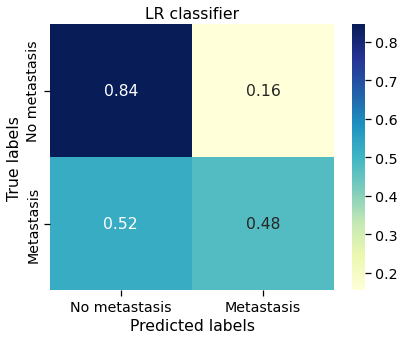

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


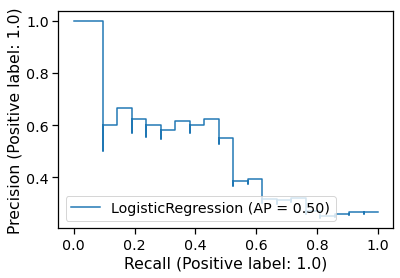

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'LR Classifier\')\nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("LR.pdf",dpi=1200)\nplt.show()\n'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,f1_score
import joblib


bcclf3 = LogisticRegression() 
bcclf3.fit(X_train,y_train)
y_pred = bcclf3.predict(X_test)

#joblib.dump(bcclf3, 'LR"1".pkl'.format("w"), compress = 1)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('LR classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("LR.pdf",dpi=1200)
plt.show()

0.7341772151898734


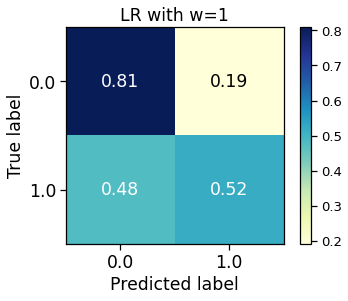

In [ ]:
import joblib

# load the model from disk
loaded_model = joblib.load(open('LR"1".pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
y_pred = loaded_model.predict(X_test)
print(result)

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='YlGnBu', normalize=True,
                                    title_fontsize='large', text_fontsize='large',
                                    title='LR with w=1')
sns.set_context("notebook", font_scale=1.2)
plt.savefig("LR_1.svg",dpi=1200)
plt.show()


Accuracy Score: 0.6075949367088608
Confusion Matrix: 
[[34 24]
 [ 7 14]]
Area Under Curve: 0.6264367816091954
Recall score: 0.6666666666666666
f1 score: 0.4745762711864407
precision score: 0.3684210526315789
              precision    recall  f1-score   support

         0.0       0.83      0.59      0.69        58
         1.0       0.37      0.67      0.47        21

    accuracy                           0.61        79
   macro avg       0.60      0.63      0.58        79
weighted avg       0.71      0.61      0.63        79






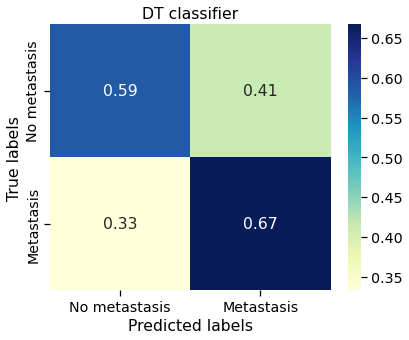

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


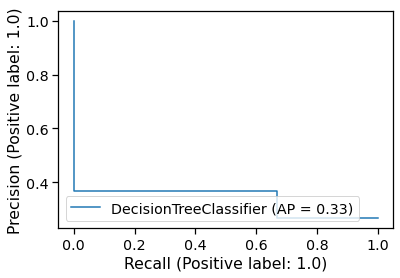

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'DT Classifier\')\nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("DT.pdf",dpi=1200)\nplt.show()\n'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,f1_score
import joblib


bcclf3 = DecisionTreeClassifier() 
bcclf3.fit(X_train,y_train)
y_pred = bcclf3.predict(X_test)

#joblib.dump(bcclf3, 'DT"1".pkl'.format("w"), compress = 1)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('DT classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("DT.pdf",dpi=1200)
plt.show()

0.7468354430379747


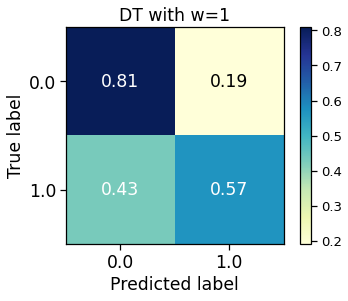

In [ ]:
import joblib

# load the model from disk
loaded_model = joblib.load(open('DT"1".pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
y_pred = loaded_model.predict(X_test)
print(result)

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='YlGnBu', normalize=True,
                                    title_fontsize='large', text_fontsize='large',
                                    title='DT with w=1')
sns.set_context("notebook", font_scale=1.2)
plt.savefig("DT_1.svg",dpi=1200)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score: 0.7215189873417721
Confusion Matrix: 
[[52  6]
 [16  5]]
Area Under Curve: 0.5673234811165846
Recall score: 0.23809523809523808
f1 score: 0.31249999999999994
precision score: 0.45454545454545453
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        58
         1.0       0.45      0.24      0.31        21

    accuracy                           0.72        79
   macro avg       0.61      0.57      0.57        79
weighted avg       0.68      0.72      0.69        79






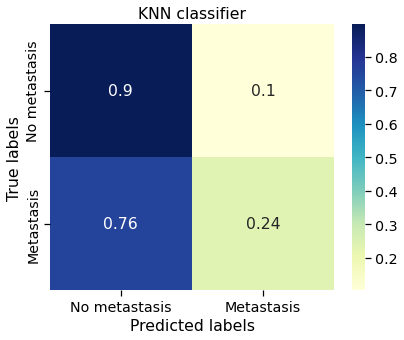

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


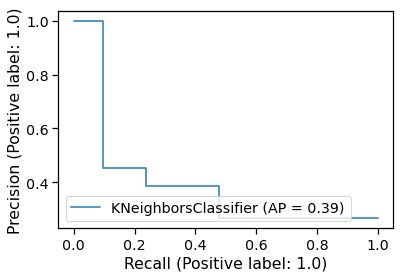

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'KNN Classifier\')\nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("KNN.pdf",dpi=1200)\nplt.show()\n'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
import joblib


bcclf3 = KNeighborsClassifier(n_neighbors=3, metric="hamming") 
bcclf3.fit(X_train,y_train)
y_pred = bcclf3.predict(X_test)

#joblib.dump(bcclf3, 'KNN"1".pkl'.format("w"), compress = 1)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('KNN classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("KNN.pdf",dpi=1200)
plt.show()

# Cost insensitive

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.7341772151898734
Confusion Matrix: 
[[45 13]
 [ 8 13]]
Area Under Curve: 0.6974548440065681
Recall score: 0.6190476190476191
f1 score: 0.5531914893617021
precision score: 0.5
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81        58
         1.0       0.50      0.62      0.55        21

    accuracy                           0.73        79
   macro avg       0.67      0.70      0.68        79
weighted avg       0.76      0.73      0.74        79






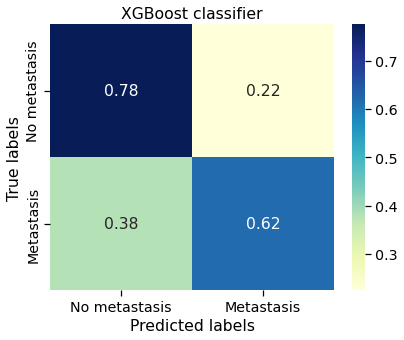

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'XGBoost Classifier\')\nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("XGBoost.pdf",dpi=1200)\nplt.show()\n'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve

from xgboost import XGBClassifier
import joblib


bcclf3 = XGBClassifier()
bcclf3.fit(X_train,y_train)
y_pred = bcclf3.predict(X_test)

#joblib.dump(bcclf3, 'XGB"1".pkl'.format(w), compress = 1)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('XGBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("XGBoost.pdf",dpi=1200)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.7468354430379747
Confusion Matrix: 
[[48 10]
 [10 11]]
Area Under Curve: 0.6756978653530378
Recall score: 0.5238095238095238
f1 score: 0.5238095238095238
precision score: 0.5238095238095238
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        58
         1.0       0.52      0.52      0.52        21

    accuracy                           0.75        79
   macro avg       0.68      0.68      0.68        79
weighted avg       0.75      0.75      0.75        79






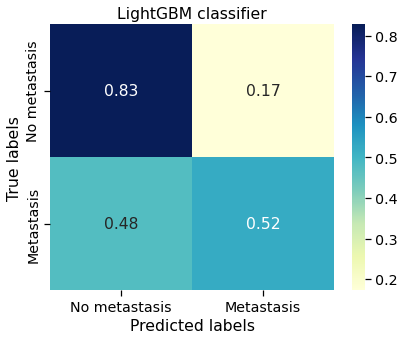

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


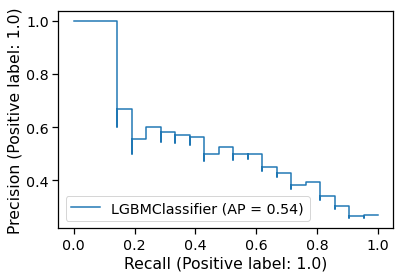

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'LightGBM Classifier\')\nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("LightGBM.pdf",dpi=1200)\nplt.show()\n'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
import lightgbm as lgb
import joblib



X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

bcclf3 = lgb.LGBMClassifier() 
bcclf3.fit(X_train,y_train, verbose=False)
y_pred = bcclf3.predict(X_test)

#joblib.dump(bcclf3, 'XGB"1".pkl'.format(w), compress = 1)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('LightGBM classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("LightGBM.pdf",dpi=1200)
plt.show()

In [ ]:
pip install catboost

Accuracy Score: 0.7848101265822784
Confusion Matrix: 
[[53  5]
 [12  9]]
Area Under Curve: 0.6711822660098521
Recall score: 0.42857142857142855
f1 score: 0.5142857142857143
precision score: 0.6428571428571429
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        58
         1.0       0.64      0.43      0.51        21

    accuracy                           0.78        79
   macro avg       0.73      0.67      0.69        79
weighted avg       0.77      0.78      0.77        79






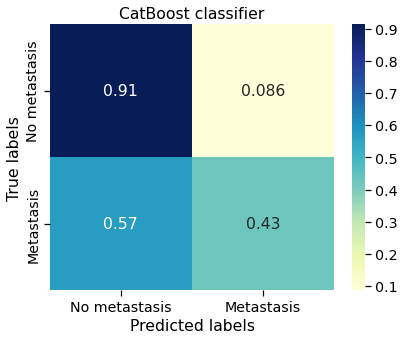

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


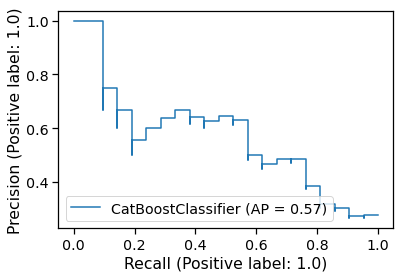

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'CatBoost Classifier\')\nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("CatBoost.pdf",dpi=1200)\nplt.show()\n'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,f1_score

from catboost import CatBoostClassifier
import joblib


X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

bcclf3 = CatBoostClassifier() #iterations=100, learning_rate=0.3
bcclf3.fit(X_train,y_train,
           cat_features=list(range(0, X_train.shape[1])),
           verbose=False)

y_pred = bcclf3.predict(X_test)

#joblib.dump(bcclf3, 'CatBoost"1".pkl'.format(w), compress = 1)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('CatBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])
plt.tight_layout()

plt.savefig("CatBoost.pdf",dpi=1200)
plt.show()

0.7974683544303798


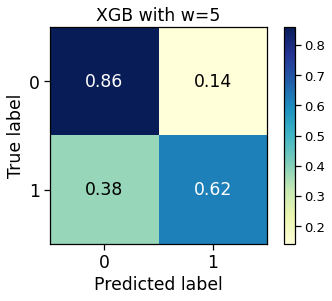

In [ ]:
import joblib

# load the model from disk
loaded_model = joblib.load(open('CatBoost"1".pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
y_pred = loaded_model.predict(X_test)
print(result)

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='YlGnBu', normalize=True,
                                    title_fontsize='large', text_fontsize='large',
                                    title='XGB with w=5')
sns.set_context("notebook", font_scale=1.2)
plt.savefig("XGB_5.svg",dpi=1200)
plt.show()

# Cost sensitive

In [ ]:
import pandas as pd
X_train = pd.read_csv("X_train_FS.csv")
y_train = pd.read_csv("y_train_FS.csv")
X_test = pd.read_csv("X_test_FS.csv")
y_test = pd.read_csv("y_test_FS.csv")

In [ ]:
pip install scikit-plot

# CS-XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 70.89%
AUCCCCCC: 66.50%
PRECISION: 46.15%
RECALL: 57.14%
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        58
         1.0       0.46      0.57      0.51        21

    accuracy                           0.71        79
   macro avg       0.65      0.67      0.65        79
weighted avg       0.73      0.71      0.72        79



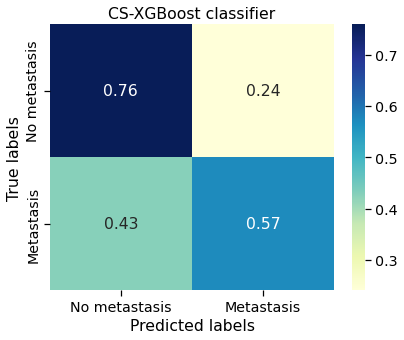

'\nprobas = model.predict_proba(X_test)\nplot_precision_recall_curve(model, X_test, y_test)\nplt.show()\n'

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

dtrain = xgb.DMatrix(X_train, y_train)

def custom_loss(y, y_hat):
    y = dtrain.get_label()
    p = y_hat
    beta=2
    grad = (beta-1) * p * y + p - beta * y
    hess = ((beta-1) * y + 1) * (p * (1.0 - p))

    return grad, hess

def custom_eval(beta, y, y_hat):
    p =  1.0 / (1.0 + np.exp(-y_hat))

    loss_fn = y*np.log(p)
    #print(loss_fn)
    loss_fp = (1 - y)*np.log(1.0 - p)
    #print(loss_fp)
    print(np.sum(-(beta*loss_fn+loss_fp))/len(y))
    return 'error val', np.sum(-(beta*loss_fn+loss_fp))/len(y), True 


xgb_params = {
        'n_jobs': -1,
        'objective': custom_loss,
        'metric': "auc",
        'verbose': 100
    }

# fit model with training data
model = xgb.XGBClassifier(**xgb_params)
model.fit(X_train, y_train, eval_metric=custom_eval)
#print(model.get_params()['objective'])

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('CS-XGBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("CS-XGBoost.pdf",dpi=600)
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'CS-XGB.pkl'.format("w"), compress = 1)

# CS-LightGBM

In [ ]:
import numpy as np
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score


beta=2

def custom_loss(y, y_hat):
    #y = dtrain.get_label()

    p = 1.0 / (1.0 + np.exp(-y_hat))
    grad = (beta-1) * p * y + p - beta * y
    hess = ((beta-1) * y + 1) * (p * (1.0 - p))
    #print(grad,"   ",hess)
    return grad, hess

def custom_eval(y, y_hat):
    #y = dtrain.get_label()

    """
    y_hat = y_hat.reshape(len(np.unique(y_hat)), -1)
    y_hat = y_hat.argmax(axis = 0)
    """
    p =  1.0 / (1.0 + np.exp(-y_hat))

    loss_fn = y*np.log(p)
    #print(loss_fn)
    loss_fp = (1 - y)*np.log(1.0 - p)
    #print(loss_fp)
    print(np.sum(-(beta*loss_fn+loss_fp))/len(y))
    return 'error val', np.sum(-(beta*loss_fn+loss_fp))/len(y), True 


lgb_tr = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test)

# fit model with training data
model = lgb.LGBMClassifier(objective=custom_loss)
model.fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric=custom_eval)

# make predictions for test data
predictions = model.predict(X_test)
y_pred = [np.round(value) for value in predictions]

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('CS-LightGBM classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("CS-LightGBM.pdf",dpi=1200)
plt.show()

# CS-CatBoost

In [ ]:
pip install catboost  #1.0.6

AUCCCCCC: 73.85%
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.56      0.67      0.61        21

    accuracy                           0.77        79
   macro avg       0.72      0.74      0.72        79
weighted avg       0.79      0.77      0.78        79



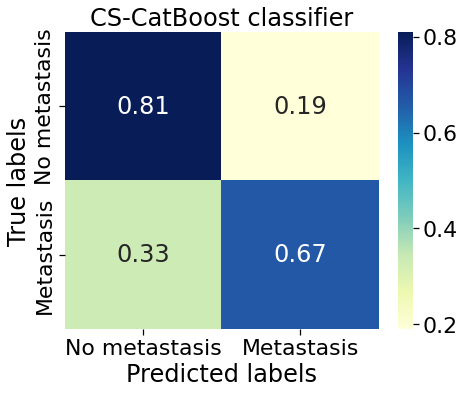

{'learn': {'F1': [0.6323529411764707, 0.6323529411764707, 0.6323529411764707, 0.6323529411764707, 0.6323529411764707, 0.6323529411764707, 0.6712328767123288, 0.6712328767123288, 0.6323529411764707, 0.6714285714285715, 0.6712328767123288, 0.6712328767123288, 0.6620689655172415, 0.676056338028169, 0.676056338028169, 0.676056338028169, 0.657142857142857, 0.676056338028169, 0.676056338028169, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.6853146853146852, 0.685314

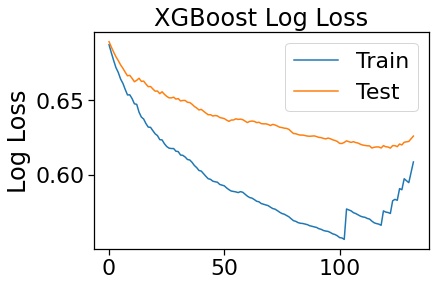

'\nimport joblib\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scikitplot as skplt \nskplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap=\'YlGnBu\', normalize=True,\n                                    title_fontsize=\'large\', text_fontsize=\'large\',\n                                    title=\'CS-CatBoost Classifier\', display_labels=[\'No metastasis\', \'Metastasis\'])                      \nsns.set_context("notebook", font_scale=1.2)\nplt.savefig("CS-CatBoost.pdf",dpi=1200)\nplt.show()\n\nimport joblib\njoblib.dump(model, \'/content/drive/MyDrive/MorBreastCancer/CS-CatBoost.pkl\'.format("w"), compress = 1)\n'

In [ ]:
import seaborn as sns
import numpy as np
from catboost import Pool, CatBoostClassifier
import scikitplot as skplt 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,accuracy_score,roc_auc_score, plot_precision_recall_curve
import joblib
import matplotlib.pyplot as plt


X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

y_train = y_train.astype(int, copy=False)
y_test = y_test.astype(int, copy=False)

# Collect categocial features indices
i = 0
cat_features = []  
for column in X_train:
    cat_features.append(i)
    i=i+1


class LoglossObjective(object):

    def calc_ders_range(self, approxes, targets, weights): ############################################
        beta = 2
        """
        Computes first and second derivative of the loss function 
        with respect to the predicted value for each object.

        Parameters
        ----------
        approxes : indexed container of floats
            Current predictions for each object.

        targets : indexed container of floats
            Target values you provided with the dataset.

        weight : float, optional (default=None)
            Instance weight.

        Returns
        -------
            der1 : list-like object of float
            der2 : list-like object of float

        """
              
        result = []

        y_true = targets
        y_pred = approxes

        for index in range(len(y_pred)):
            e = np.exp(approxes[index])
            p = e / (1 + e)
            
            der1 = (beta-1) * p * y_true[index] + p - (beta)* y_true[index]
            der2 = ((beta-1) * y_true[index] + 1) * (p * (1.0 - p))
            
            """
            der1 = (1 - p) if y_true[index] > 0.0 else -p
            der2 = -p * (1 - p)
            """
            result.append((der1, der2))

        return result      
        
class LoglossMetric(object):
    def get_final_error(self, error, weight):
        """
        Returns final value of metric based on error and weight.

        Parameters
        ----------
        error : float
            Sum of errors in all instances.
            
        weight : float
            Sum of weights of all instances.

        Returns
        -------
        metric value : float

        """
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        """
        Returns whether great values of metric are better
        """
        return False

    def evaluate(self, approxes, target, weight):
        """
        Evaluates metric value.

        Parameters
        ----------
        approxes : list of indexed containers (containers with only __len__ and __getitem__ defined) of float
            Vectors of approx labels.

        targets : one dimensional indexed container of float
            Vectors of true labels.

        weights : one dimensional indexed container of float, optional (default=None)
            Weight for each instance.

        Returns
        -------
            weighted error : float
            total weight : float

        """
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])
        
        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            e = np.exp(approx[i])
            p = e / (1 + e)
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += -w * (target[i] * np.log(p) + (1 - target[i]) * np.log(1 - p))
            print("uuuuuuunweightttttttttt.  ",error_sum)
            print("weightttttttttt.  ",self.err_rate(approxes, target))
            #return error_sum,weight_sum


            return self.err_rate(approxes, target), 0   #eroor value, boolean(maximaize or minimize)
   
    def err_rate(self, y_hat, y_true): ######################
        beta = 2

        y_pred = np.clip(y_hat, 10e-7, 1-10e-7)
        loss_fn = (beta-1)*y_true*np.log(y_pred)
        loss_fp = (1.0 - y_true)*np.log(1.0 - y_pred)
        print("======>   ",(np.sum(-(loss_fn+loss_fp))/len(y_true)))
        return  np.sum(-(loss_fn+loss_fp))/len(y_true)
    

params = {
    'eval_metric': 'Logloss', 
    'custom_metric': ['Logloss', 'F1'],
}


model = CatBoostClassifier(**params, iterations=700, depth=1, bootstrap_type='Bayesian', leaf_estimation_method='Newton', 
                           loss_function=LoglossObjective(), verbose=0) #eval_metric= LoglossMetric()

evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_set=evalset, early_stopping_rounds=10)#, cat_features=cat_features)


##Predictions
predictions = model.predict_proba(X_test)[:,1]

# make predictions for test data
y_pred = [np.round(value) for value in predictions]

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#========================================================

sns.set_context("notebook", font_scale=2)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (7,6))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')#, display_labels=['No metastasis', 'Metastasis'] );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('CS-CatBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])
plt.tight_layout()
plt.savefig("CS-CatBoost.pdf",dpi=1200)
plt.show()
#==================================================================

skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='YlGnBu', normalize=True,
                                    title_fontsize='large', text_fontsize='large',
                                    title='CS-CatBoost Classifier', display_labels=['No metastasis', 'Metastasis'])                      
sns.set_context("notebook", font_scale=1.2)
plt.savefig("CS-CatBoost.pdf",dpi=1200)
plt.show()

#joblib.dump(model, 'CS-CatBoost.pkl'.format("w"), compress = 1)


In [ ]:
#install then restart
!pip install seaborn==0.12.1

In [ ]:
pip uninstall seaborn[stats]

/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


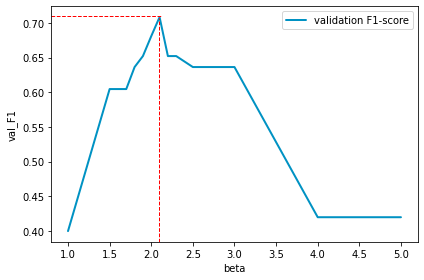

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import pandas as pd

#we run the CS-CatBoost with different beta values and saved the loss and F1 score
beta = np.array([1,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.5,3,4,5])
val_loss = np.array([0.5829269153477675,0.578289535140304,0.5796824155202139,0.5891709467325428,0.5966460110690319,0.6083952057100382,0.6180693284303259,0.6283753125692059,0.6539834768176015,0.6716273767533728,0.6787199407279226,0.690866548931651,0.6992281833298204,0.700509245921143])
val_f1 = np.array([0.4,0.6046511627906977,0.6046511627906977,0.6046511627906977,0.6363636363636365,0.6521739130434783,0.6808510638297872,0.7083333333333334,0.6521739130434783,0.6521739130434783,0.6363636363636365,0.6363636363636365,0.41999999999999993,0.41999999999999993])

# convert to pandas dataframe
d = {'beta': beta, 'val_Logloss': val_loss, 'val_F1': val_f1}
plot_data = pd.DataFrame(d)

fig, ax1 = plt.subplots()

p = so.Plot(plot_data, x="beta")
p.add(so.Line(color="#0092C3", linewidth=2), y="val_F1").on(ax1).plot()
#p.add(so.Line(color="orange"), y="val_Logloss").on(ax2).plot()
plt.legend(labels=[ "validation F1-score"], loc ="upper right")

plt.axvline(2.05, 0,0.95, color="red", linestyle='--', linewidth=1)
plt.axhline(0.71, 0,0.3, color="red", linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig("beta_choice.png", dpi=600)

# LIME TABULAR CODE

In [ ]:
pip install pyDOE2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=1d4cb628ccb5190f87d15dc0612e8d81f54341e2f03e054836b935d3f7d207d6
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [ ]:
"""
Contains abstract functionality for learning locally linear sparse model.
"""
import numpy as np
import scipy as sp
from sklearn.linear_model import Ridge, lars_path
from sklearn.utils import check_random_state


class LimeBase(object):
    """Class for learning a locally linear sparse model from perturbed data"""
    def __init__(self,
                 kernel_fn,
                 verbose=False,
                 random_state=None):
        """Init function

        Args:
            kernel_fn: function that transforms an array of distances into an
                        array of proximity values (floats).
            verbose: if true, print local prediction values from linear model.
            random_state: an integer or numpy.RandomState that will be used to
                generate random numbers. If None, the random state will be
                initialized using the internal numpy seed.
        """
        self.kernel_fn = kernel_fn
        self.verbose = verbose
        self.random_state = check_random_state(random_state)

    @staticmethod
    def generate_lars_path(weighted_data, weighted_labels):
        """Generates the lars path for weighted data.

        Args:
            weighted_data: data that has been weighted by kernel
            weighted_label: labels, weighted by kernel

        Returns:
            (alphas, coefs), both are arrays corresponding to the
            regularization parameter and coefficients, respectively
        """
        x_vector = weighted_data
        alphas, _, coefs = lars_path(x_vector,
                                     weighted_labels,
                                     method='lasso',
                                     verbose=False)
        return alphas, coefs

    def forward_selection(self, data, labels, weights, num_features):
        """Iteratively adds features to the model"""
        clf = Ridge(alpha=0, fit_intercept=True, random_state=self.random_state)
        used_features = []
        for _ in range(min(num_features, data.shape[1])):
            max_ = -100000000
            best = 0
            for feature in range(data.shape[1]):
                if feature in used_features:
                    continue
                clf.fit(data[:, used_features + [feature]], labels,
                        sample_weight=weights)
                score = clf.score(data[:, used_features + [feature]],
                                  labels,
                                  sample_weight=weights)
                if score > max_:
                    best = feature
                    max_ = score
            used_features.append(best)
        return np.array(used_features)

    def feature_selection(self, data, labels, weights, num_features, method):
        """Selects features for the model. see explain_instance_with_data to
           understand the parameters."""
        if method == 'none':
            return np.array(range(data.shape[1]))
        elif method == 'forward_selection':
            return self.forward_selection(data, labels, weights, num_features)
        elif method == 'highest_weights':
            clf = Ridge(alpha=0.01, fit_intercept=True,
                        random_state=self.random_state)
            clf.fit(data, labels, sample_weight=weights)

            coef = clf.coef_
            if sp.sparse.issparse(data):
                coef = sp.sparse.csr_matrix(clf.coef_)
                weighted_data = coef.multiply(data[0])
                # Note: most efficient to slice the data before reversing
                sdata = len(weighted_data.data)
                argsort_data = np.abs(weighted_data.data).argsort()
                # Edge case where data is more sparse than requested number of feature importances
                # In that case, we just pad with zero-valued features
                if sdata < num_features:
                    nnz_indexes = argsort_data[::-1]
                    indices = weighted_data.indices[nnz_indexes]
                    num_to_pad = num_features - sdata
                    indices = np.concatenate((indices, np.zeros(num_to_pad, dtype=indices.dtype)))
                    indices_set = set(indices)
                    pad_counter = 0
                    for i in range(data.shape[1]):
                        if i not in indices_set:
                            indices[pad_counter + sdata] = i
                            pad_counter += 1
                            if pad_counter >= num_to_pad:
                                break
                else:
                    nnz_indexes = argsort_data[sdata - num_features:sdata][::-1]
                    indices = weighted_data.indices[nnz_indexes]
                return indices
            else:
                weighted_data = coef * data[0]
                feature_weights = sorted(
                    zip(range(data.shape[1]), weighted_data),
                    key=lambda x: np.abs(x[1]),
                    reverse=True)
                return np.array([x[0] for x in feature_weights[:num_features]])
        elif method == 'lasso_path':
            weighted_data = ((data - np.average(data, axis=0, weights=weights))
                             * np.sqrt(weights[:, np.newaxis]))
            weighted_labels = ((labels - np.average(labels, weights=weights))
                               * np.sqrt(weights))
            nonzero = range(weighted_data.shape[1])
            _, coefs = self.generate_lars_path(weighted_data,
                                               weighted_labels)
            for i in range(len(coefs.T) - 1, 0, -1):
                nonzero = coefs.T[i].nonzero()[0]
                if len(nonzero) <= num_features:
                    break
            used_features = nonzero
            return used_features
        elif method == 'auto':
            if num_features <= 6:
                n_method = 'forward_selection'
            else:
                n_method = 'highest_weights'
            return self.feature_selection(data, labels, weights,
                                          num_features, n_method)

    def explain_instance_with_data(self,
                                   neighborhood_data,
                                   neighborhood_labels,
                                   distances,
                                   label,
                                   num_features,
                                   feature_selection='auto',
                                   model_regressor=None):
        """Takes perturbed data, labels and distances, returns explanation.

        Args:
            neighborhood_data: perturbed data, 2d array. first element is
                               assumed to be the original data point.
            neighborhood_labels: corresponding perturbed labels. should have as
                                 many columns as the number of possible labels.
            distances: distances to original data point.
            label: label for which we want an explanation
            num_features: maximum number of features in explanation
            feature_selection: how to select num_features. options are:
                'forward_selection': iteratively add features to the model.
                    This is costly when num_features is high
                'highest_weights': selects the features that have the highest
                    product of absolute weight * original data point when
                    learning with all the features
                'lasso_path': chooses features based on the lasso
                    regularization path
                'none': uses all features, ignores num_features
                'auto': uses forward_selection if num_features <= 6, and
                    'highest_weights' otherwise.
            model_regressor: sklearn regressor to use in explanation.
                Defaults to Ridge regression if None. Must have
                model_regressor.coef_ and 'sample_weight' as a parameter
                to model_regressor.fit()

        Returns:
            (intercept, exp, score, local_pred):
            intercept is a float.
            exp is a sorted list of tuples, where each tuple (x,y) corresponds
            to the feature id (x) and the local weight (y). The list is sorted
            by decreasing absolute value of y.
            score is the R^2 value of the returned explanation
            local_pred is the prediction of the explanation model on the original instance
        """

        weights = self.kernel_fn(distances)
        labels_column = neighborhood_labels[:, label]
        used_features = self.feature_selection(neighborhood_data,
                                               labels_column,
                                               weights,
                                               num_features,
                                               feature_selection)
        if model_regressor is None:
            model_regressor = Ridge(alpha=1, fit_intercept=True,
                                    random_state=self.random_state)
        easy_model = model_regressor
        easy_model.fit(neighborhood_data[:, used_features],
                       labels_column, sample_weight=weights)
        prediction_score = easy_model.score(
            neighborhood_data[:, used_features],
            labels_column, sample_weight=weights)

        local_pred = easy_model.predict(neighborhood_data[0, used_features].reshape(1, -1))

        if self.verbose:
            print('Intercept', easy_model.intercept_)
            print('Prediction_local', local_pred,)
            print('Right:', neighborhood_labels[0, label])
        return (easy_model.intercept_,
                sorted(zip(used_features, easy_model.coef_),
                       key=lambda x: np.abs(x[1]), reverse=True),
                prediction_score, local_pred)

In [ ]:
"""
Explanation class, with visualization functions.
"""
from io import open
import os
import os.path
import json
import string
import numpy as np

from sklearn.utils import check_random_state


def id_generator(size=15, random_state=None):
    """Helper function to generate random div ids. This is useful for embedding
    HTML into ipython notebooks."""
    chars = list(string.ascii_uppercase + string.digits)
    return ''.join(random_state.choice(chars, size, replace=True))


class DomainMapper(object):
    """Class for mapping features to the specific domain.

    The idea is that there would be a subclass for each domain (text, tables,
    images, etc), so that we can have a general Explanation class, and separate
    out the specifics of visualizing features in here.
    """

    def __init__(self):
        pass

    def map_exp_ids(self, exp, **kwargs):
        """Maps the feature ids to concrete names.

        Default behaviour is the identity function. Subclasses can implement
        this as they see fit.

        Args:
            exp: list of tuples [(id, weight), (id,weight)]
            kwargs: optional keyword arguments

        Returns:
            exp: list of tuples [(name, weight), (name, weight)...]
        """
        return exp

    def visualize_instance_html(self,
                                exp,
                                label,
                                div_name,
                                exp_object_name,
                                **kwargs):
        """Produces html for visualizing the instance.

        Default behaviour does nothing. Subclasses can implement this as they
        see fit.

        Args:
             exp: list of tuples [(id, weight), (id,weight)]
             label: label id (integer)
             div_name: name of div object to be used for rendering(in js)
             exp_object_name: name of js explanation object
             kwargs: optional keyword arguments

        Returns:
             js code for visualizing the instance
        """
        return ''


class Explanation(object):
    """Object returned by explainers."""

    def __init__(self,
                 domain_mapper,
                 mode='classification',
                 class_names=None,
                 random_state=None):
        """

        Initializer.

        Args:
            domain_mapper: must inherit from DomainMapper class
            type: "classification" or "regression"
            class_names: list of class names (only used for classification)
            random_state: an integer or numpy.RandomState that will be used to
                generate random numbers. If None, the random state will be
                initialized using the internal numpy seed.
        """
        self.random_state = random_state
        self.mode = mode
        self.domain_mapper = domain_mapper
        self.local_exp = {}
        self.intercept = {}
        self.score = {}
        self.local_pred = {}
        if mode == 'classification':
            self.class_names = class_names
            self.top_labels = None
            self.predict_proba = None
        elif mode == 'regression':
            self.class_names = ['negative', 'positive']
            self.predicted_value = None
            self.min_value = 0.0
            self.max_value = 1.0
            self.dummy_label = 1
        else:
            raise LimeError('Invalid explanation mode "{}". '
                            'Should be either "classification" '
                            'or "regression".'.format(mode))

    def available_labels(self):
        """
        Returns the list of classification labels for which we have any explanations.
        """
        try:
            assert self.mode == "classification"
        except AssertionError:
            raise NotImplementedError('Not supported for regression explanations.')
        else:
            ans = self.top_labels if self.top_labels else self.local_exp.keys()
            return list(ans)

    def as_list(self, label=1, **kwargs):
        """Returns the explanation as a list.

        Args:
            label: desired label. If you ask for a label for which an
                explanation wasn't computed, will throw an exception.
                Will be ignored for regression explanations.
            kwargs: keyword arguments, passed to domain_mapper

        Returns:
            list of tuples (representation, weight), where representation is
            given by domain_mapper. Weight is a float.
        """
        label_to_use = label if self.mode == "classification" else self.dummy_label
        ans = self.domain_mapper.map_exp_ids(self.local_exp[label_to_use], **kwargs)
        ans = [(x[0], float(x[1])) for x in ans]
        return ans

    def as_map(self):
        """Returns the map of explanations.

        Returns:
            Map from label to list of tuples (feature_id, weight).
        """
        return self.local_exp

    def as_pyplot_figure(self, label=1, figsize=(4,4), **kwargs):
        """Returns the explanation as a pyplot figure.

        Will throw an error if you don't have matplotlib installed
        Args:
            label: desired label. If you ask for a label for which an
                   explanation wasn't computed, will throw an exception.
                   Will be ignored for regression explanations.
            figsize: desired size of pyplot in tuple format, defaults to (4,4).
            kwargs: keyword arguments, passed to domain_mapper

        Returns:
            pyplot figure (barchart).
        """
        import matplotlib.pyplot as plt
        exp = self.as_list(label=label, **kwargs)
        fig = plt.figure(figsize=figsize)
        vals = [x[1] for x in exp]
        names = [x[0] for x in exp]
        vals.reverse()
        names.reverse()
        colors = ['green' if x > 0 else 'red' for x in vals]
        pos = np.arange(len(exp)) + .5
        plt.barh(pos, vals, align='center', color=colors)
        plt.yticks(pos, names)
        if self.mode == "classification":
            title = 'Local explanation for class %s' % self.class_names[label]
        else:
            title = 'Local explanation'
        plt.title(title)
        return fig

    def show_in_notebook(self,
                         labels=None,
                         predict_proba=True,
                         show_predicted_value=True,
                         **kwargs):
        """Shows html explanation in ipython notebook.

        See as_html() for parameters.
        This will throw an error if you don't have IPython installed"""

        from IPython.core.display import display, HTML
        display(HTML(self.as_html(labels=labels,
                                  predict_proba=predict_proba,
                                  show_predicted_value=show_predicted_value,
                                  **kwargs)))

    def save_to_file(self,
                     file_path,
                     labels=None,
                     predict_proba=True,
                     show_predicted_value=True,
                     **kwargs):
        """Saves html explanation to file. .

        Params:
            file_path: file to save explanations to

        See as_html() for additional parameters.

        """
        file_ = open(file_path, 'w', encoding='utf8')
        file_.write(self.as_html(labels=labels,
                                 predict_proba=predict_proba,
                                 show_predicted_value=show_predicted_value,
                                 **kwargs))
        file_.close()

    def as_html(self,
                labels=None,
                predict_proba=True,
                show_predicted_value=True,
                **kwargs):
        """Returns the explanation as an html page.

        Args:
            labels: desired labels to show explanations for (as barcharts).
                If you ask for a label for which an explanation wasn't
                computed, will throw an exception. If None, will show
                explanations for all available labels. (only used for classification)
            predict_proba: if true, add  barchart with prediction probabilities
                for the top classes. (only used for classification)
            show_predicted_value: if true, add  barchart with expected value
                (only used for regression)
            kwargs: keyword arguments, passed to domain_mapper

        Returns:
            code for an html page, including javascript includes.
        """

        def jsonize(x):
            return json.dumps(x, ensure_ascii=False)

        if labels is None and self.mode == "classification":
            labels = self.available_labels()

        #this_dir, _ = os.path.split(__file__)
        bundle = open('LIME/bundle.js',
                      encoding="utf8").read()

        out = u'''<html>
        <meta http-equiv="content-type" content="text/html; charset=UTF8">
        <head><script>%s </script></head><body>''' % bundle
        random_id = id_generator(size=15, random_state=check_random_state(self.random_state))
        out += u'''
        <div class="lime top_div" id="top_div%s"></div>
        ''' % random_id

        predict_proba_js = ''
        if self.mode == "classification" and predict_proba:
            predict_proba_js = u'''
            var pp_div = top_div.append('div')
                                .classed('lime predict_proba', true);
            var pp_svg = pp_div.append('svg').style('width', '100%%');
            var pp = new lime.PredictProba(pp_svg, %s, %s);
            ''' % (jsonize([str(x) for x in self.class_names]),
                   jsonize(list(self.predict_proba.astype(float))))

        predict_value_js = ''
        if self.mode == "regression" and show_predicted_value:
            # reference self.predicted_value
            # (svg, predicted_value, min_value, max_value)
            predict_value_js = u'''
                    var pp_div = top_div.append('div')
                                        .classed('lime predicted_value', true);
                    var pp_svg = pp_div.append('svg').style('width', '100%%');
                    var pp = new lime.PredictedValue(pp_svg, %s, %s, %s);
                    ''' % (jsonize(float(self.predicted_value)),
                           jsonize(float(self.min_value)),
                           jsonize(float(self.max_value)))

        exp_js = '''var exp_div;
            var exp = new lime.Explanation(%s);
        ''' % (jsonize([str(x) for x in self.class_names]))

        if self.mode == "classification":
            for label in labels:
                exp = jsonize(self.as_list(label))
                exp_js += u'''
                exp_div = top_div.append('div').classed('lime explanation', true);
                exp.show(%s, %d, exp_div);
                ''' % (exp, label)
        else:
            exp = jsonize(self.as_list())
            exp_js += u'''
            exp_div = top_div.append('div').classed('lime explanation', true);
            exp.show(%s, %s, exp_div);
            ''' % (exp, self.dummy_label)

        raw_js = '''var raw_div = top_div.append('div');'''

        if self.mode == "classification":
            html_data = self.local_exp[labels[0]]
        else:
            html_data = self.local_exp[self.dummy_label]

        raw_js += self.domain_mapper.visualize_instance_html(
                html_data,
                labels[0] if self.mode == "classification" else self.dummy_label,
                'raw_div',
                'exp',
                **kwargs)
        out += u'''
        <script>
        var top_div = d3.select('#top_div%s').classed('lime top_div', true);
        %s
        %s
        %s
        %s
        </script>
        ''' % (random_id, predict_proba_js, predict_value_js, exp_js, raw_js)
        out += u'</body></html>'

        return out

In [ ]:
class LimeError(Exception):
    """Raise for errors"""

In [ ]:
"""
Discretizers classes, to be used in lime_tabular
"""
import numpy as np
import sklearn
import sklearn.tree
import scipy
from sklearn.utils import check_random_state
from abc import ABCMeta, abstractmethod


class BaseDiscretizer():
    """
    Abstract class - Build a class that inherits from this class to implement
    a custom discretizer.
    Method bins() is to be redefined in the child class, as it is the actual
    custom part of the discretizer.
    """

    __metaclass__ = ABCMeta  # abstract class

    def __init__(self, data, categorical_features, feature_names, labels=None, random_state=None,
                 data_stats=None):
        """Initializer
        Args:
            data: numpy 2d array
            categorical_features: list of indices (ints) corresponding to the
                categorical columns. These features will not be discretized.
                Everything else will be considered continuous, and will be
                discretized.
            categorical_names: map from int to list of names, where
                categorical_names[x][y] represents the name of the yth value of
                column x.
            feature_names: list of names (strings) corresponding to the columns
                in the training data.
            data_stats: must have 'means', 'stds', 'mins' and 'maxs', use this
                if you don't want these values to be computed from data
        """
        self.to_discretize = ([x for x in range(data.shape[1])
                               if x not in categorical_features])
        self.data_stats = data_stats
        self.names = {}
        self.lambdas = {}
        self.means = {}
        self.stds = {}
        self.mins = {}
        self.maxs = {}
        self.random_state = check_random_state(random_state)

        # To override when implementing a custom binning
        bins = self.bins(data, labels)
        bins = [np.unique(x) for x in bins]

        # Read the stats from data_stats if exists
        if data_stats:
            self.means = self.data_stats.get("means")
            self.stds = self.data_stats.get("stds")
            self.mins = self.data_stats.get("mins")
            self.maxs = self.data_stats.get("maxs")

        for feature, qts in zip(self.to_discretize, bins):
            n_bins = qts.shape[0]  # Actually number of borders (= #bins-1)
            boundaries = np.min(data[:, feature]), np.max(data[:, feature])
            name = feature_names[feature]

            self.names[feature] = ['%s <= %.2f' % (name, qts[0])]
            for i in range(n_bins - 1):
                self.names[feature].append('%.2f < %s <= %.2f' %
                                           (qts[i], name, qts[i + 1]))
            self.names[feature].append('%s > %.2f' % (name, qts[n_bins - 1]))

            self.lambdas[feature] = lambda x, qts=qts: np.searchsorted(qts, x)
            discretized = self.lambdas[feature](data[:, feature])

            # If data stats are provided no need to compute the below set of details
            if data_stats:
                continue

            self.means[feature] = []
            self.stds[feature] = []
            for x in range(n_bins + 1):
                selection = data[discretized == x, feature]
                mean = 0 if len(selection) == 0 else np.mean(selection)
                self.means[feature].append(mean)
                std = 0 if len(selection) == 0 else np.std(selection)
                std += 0.00000000001
                self.stds[feature].append(std)
            self.mins[feature] = [boundaries[0]] + qts.tolist()
            self.maxs[feature] = qts.tolist() + [boundaries[1]]

    @abstractmethod
    def bins(self, data, labels):
        """
        To be overridden
        Returns for each feature to discretize the boundaries
        that form each bin of the discretizer
        """
        raise NotImplementedError("Must override bins() method")

    def discretize(self, data):
        """Discretizes the data.
        Args:
            data: numpy 2d or 1d array
        Returns:
            numpy array of same dimension, discretized.
        """
        ret = data.copy()
        for feature in self.lambdas:
            if len(data.shape) == 1:
                ret[feature] = int(self.lambdas[feature](ret[feature]))
            else:
                ret[:, feature] = self.lambdas[feature](
                    ret[:, feature]).astype(int)
        return ret

    def get_undiscretize_values(self, feature, values):
        mins = np.array(self.mins[feature])[values]
        maxs = np.array(self.maxs[feature])[values]

        means = np.array(self.means[feature])[values]
        stds = np.array(self.stds[feature])[values]
        minz = (mins - means) / stds
        maxz = (maxs - means) / stds
        min_max_unequal = (minz != maxz)

        ret = minz
        ret[np.where(min_max_unequal)] = scipy.stats.truncnorm.rvs(
            minz[min_max_unequal],
            maxz[min_max_unequal],
            loc=means[min_max_unequal],
            scale=stds[min_max_unequal],
            random_state=self.random_state
        )
        return ret

    def undiscretize(self, data):
        ret = data.copy()
        for feature in self.means:
            if len(data.shape) == 1:
                ret[feature] = self.get_undiscretize_values(
                    feature, ret[feature].astype(int).reshape(-1, 1)
                )
            else:
                ret[:, feature] = self.get_undiscretize_values(
                    feature, ret[:, feature].astype(int)
                )
        return ret


class StatsDiscretizer(BaseDiscretizer):
    """
        Class to be used to supply the data stats info when discretize_continuous is true
    """

    def __init__(self, data, categorical_features, feature_names, labels=None, random_state=None,
                 data_stats=None):

        BaseDiscretizer.__init__(self, data, categorical_features,
                                 feature_names, labels=labels,
                                 random_state=random_state,
                                 data_stats=data_stats)

    def bins(self, data, labels):
        bins_from_stats = self.data_stats.get("bins")
        bins = []
        if bins_from_stats is not None:
            for feature in self.to_discretize:
                bins_from_stats_feature = bins_from_stats.get(feature)
                if bins_from_stats_feature is not None:
                    qts = np.array(bins_from_stats_feature)
                    bins.append(qts)
        return bins


class QuartileDiscretizer(BaseDiscretizer):
    def __init__(self, data, categorical_features, feature_names, labels=None, random_state=None):

        BaseDiscretizer.__init__(self, data, categorical_features,
                                 feature_names, labels=labels,
                                 random_state=random_state)

    def bins(self, data, labels):
        bins = []
        for feature in self.to_discretize:
            qts = np.array(np.percentile(data[:, feature], [25, 50, 75]))
            bins.append(qts)
        return bins


class DecileDiscretizer(BaseDiscretizer):
    def __init__(self, data, categorical_features, feature_names, labels=None, random_state=None):
        BaseDiscretizer.__init__(self, data, categorical_features,
                                 feature_names, labels=labels,
                                 random_state=random_state)

    def bins(self, data, labels):
        bins = []
        for feature in self.to_discretize:
            qts = np.array(np.percentile(data[:, feature],
                                         [10, 20, 30, 40, 50, 60, 70, 80, 90]))
            bins.append(qts)
        return bins


class EntropyDiscretizer(BaseDiscretizer):
    def __init__(self, data, categorical_features, feature_names, labels=None, random_state=None):
        if(labels is None):
            raise ValueError('Labels must be not None when using \
                             EntropyDiscretizer')
        BaseDiscretizer.__init__(self, data, categorical_features,
                                 feature_names, labels=labels,
                                 random_state=random_state)

    def bins(self, data, labels):
        bins = []
        for feature in self.to_discretize:
            # Entropy splitting / at most 8 bins so max_depth=3
            dt = sklearn.tree.DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=self.random_state)
            x = np.reshape(data[:, feature], (-1, 1))
            dt.fit(x, labels)
            qts = dt.tree_.threshold[np.where(dt.tree_.children_left > -1)]

            if qts.shape[0] == 0:
                qts = np.array([np.median(data[:, feature])])
            else:
                qts = np.sort(qts)

            bins.append(qts)

        return bins

In [ ]:
"""
Functions for explaining classifiers that use tabular data (matrices).
"""
import collections
import copy
from functools import partial
import json
import warnings

import numpy as np
import scipy as sp
import sklearn
import sklearn.preprocessing
from sklearn.utils import check_random_state
from pyDOE2 import lhs
from scipy.stats.distributions import norm

class TableDomainMapper(DomainMapper):
    """Maps feature ids to names, generates table views, etc"""

    def __init__(self, feature_names, feature_values, scaled_row,
                 categorical_features, discretized_feature_names=None,
                 feature_indexes=None):
        """Init.
        Args:
            feature_names: list of feature names, in order
            feature_values: list of strings with the values of the original row
            scaled_row: scaled row
            categorical_features: list of categorical features ids (ints)
            feature_indexes: optional feature indexes used in the sparse case
        """
        self.exp_feature_names = feature_names
        self.discretized_feature_names = discretized_feature_names
        self.feature_names = feature_names
        self.feature_values = feature_values
        self.feature_indexes = feature_indexes
        self.scaled_row = scaled_row
        if sp.sparse.issparse(scaled_row):
            self.all_categorical = False
        else:
            self.all_categorical = len(categorical_features) == len(scaled_row)
        self.categorical_features = categorical_features

    def map_exp_ids(self, exp):
        """Maps ids to feature names.
        Args:
            exp: list of tuples [(id, weight), (id,weight)]
        Returns:
            list of tuples (feature_name, weight)
        """
        names = self.exp_feature_names
        if self.discretized_feature_names is not None:
            names = self.discretized_feature_names
        return [(names[x[0]], x[1]) for x in exp]

    def visualize_instance_html(self,
                                exp,
                                label,
                                div_name,
                                exp_object_name,
                                show_table=True,
                                show_all=False):
        """Shows the current example in a table format.
        Args:
             exp: list of tuples [(id, weight), (id,weight)]
             label: label id (integer)
             div_name: name of div object to be used for rendering(in js)
             exp_object_name: name of js explanation object
             show_table: if False, don't show table visualization.
             show_all: if True, show zero-weighted features in the table.
        """
        if not show_table:
            return ''
        weights = [0] * len(self.feature_names)
        for x in exp:
            weights[x[0]] = x[1]
        if self.feature_indexes is not None:
            # Sparse case: only display the non-zero values and importances
            fnames = [self.exp_feature_names[i] for i in self.feature_indexes]
            fweights = [weights[i] for i in self.feature_indexes]
            if show_all:
                out_list = list(zip(fnames,
                                    self.feature_values,
                                    fweights))
            else:
                out_dict = dict(map(lambda x: (x[0], (x[1], x[2], x[3])),
                                zip(self.feature_indexes,
                                    fnames,
                                    self.feature_values,
                                    fweights)))
                out_list = [out_dict.get(x[0], (str(x[0]), 0.0, 0.0)) for x in exp]
        else:
            out_list = list(zip(self.exp_feature_names,
                                self.feature_values,
                                weights))
            if not show_all:
                out_list = [out_list[x[0]] for x in exp]
        ret = u'''
            %s.show_raw_tabular(%s, %d, %s);
        ''' % (exp_object_name, json.dumps(out_list, ensure_ascii=False), label, div_name)
        return ret


class LimeTabularExplainer(object):
    """Explains predictions on tabular (i.e. matrix) data.
    For numerical features, perturb them by sampling from a Normal(0,1) and
    doing the inverse operation of mean-centering and scaling, according to the
    means and stds in the training data. For categorical features, perturb by
    sampling according to the training distribution, and making a binary
    feature that is 1 when the value is the same as the instance being
    explained."""

    def __init__(self,
                 training_data,
                 mode="classification",
                 training_labels=None,
                 feature_names=None,
                 categorical_features=None,
                 categorical_names=None,
                 kernel_width=None,
                 kernel=None,
                 verbose=False,
                 class_names=None,
                 feature_selection='auto',
                 discretize_continuous=True,
                 discretizer='quartile',
                 sample_around_instance=False,
                 random_state=None,
                 training_data_stats=None):
        """Init function.
        Args:
            training_data: numpy 2d array
            mode: "classification" or "regression"
            training_labels: labels for training data. Not required, but may be
                used by discretizer.
            feature_names: list of names (strings) corresponding to the columns
                in the training data.
            categorical_features: list of indices (ints) corresponding to the
                categorical columns. Everything else will be considered
                continuous. Values in these columns MUST be integers.
            categorical_names: map from int to list of names, where
                categorical_names[x][y] represents the name of the yth value of
                column x.
            kernel_width: kernel width for the exponential kernel.
                If None, defaults to sqrt (number of columns) * 0.75
            kernel: similarity kernel that takes euclidean distances and kernel
                width as input and outputs weights in (0,1). If None, defaults to
                an exponential kernel.
            verbose: if true, print local prediction values from linear model
            class_names: list of class names, ordered according to whatever the
                classifier is using. If not present, class names will be '0',
                '1', ...
            feature_selection: feature selection method. can be
                'forward_selection', 'lasso_path', 'none' or 'auto'.
                See function 'explain_instance_with_data' in lime_base.py for
                details on what each of the options does.
            discretize_continuous: if True, all non-categorical features will
                be discretized into quartiles.
            discretizer: only matters if discretize_continuous is True
                and data is not sparse. Options are 'quartile', 'decile',
                'entropy' or a BaseDiscretizer instance.
            sample_around_instance: if True, will sample continuous features
                in perturbed samples from a normal centered at the instance
                being explained. Otherwise, the normal is centered on the mean
                of the feature data.
            random_state: an integer or numpy.RandomState that will be used to
                generate random numbers. If None, the random state will be
                initialized using the internal numpy seed.
            training_data_stats: a dict object having the details of training data
                statistics. If None, training data information will be used, only matters
                if discretize_continuous is True. Must have the following keys:
                means", "mins", "maxs", "stds", "feature_values",
                "feature_frequencies"
        """
        self.random_state = check_random_state(random_state)
        self.mode = mode
        self.categorical_names = categorical_names or {}
        self.sample_around_instance = sample_around_instance
        self.training_data_stats = training_data_stats

        # Check and raise proper error in stats are supplied in non-descritized path
        if self.training_data_stats:
            self.validate_training_data_stats(self.training_data_stats)

        if categorical_features is None:
            categorical_features = []
        if feature_names is None:
            feature_names = [str(i) for i in range(training_data.shape[1])]

        self.categorical_features = list(categorical_features)
        self.feature_names = list(feature_names)

        self.discretizer = None
        if discretize_continuous and not sp.sparse.issparse(training_data):
            # Set the discretizer if training data stats are provided
            if self.training_data_stats:
                discretizer = StatsDiscretizer(
                    training_data, self.categorical_features,
                    self.feature_names, labels=training_labels,
                    data_stats=self.training_data_stats,
                    random_state=self.random_state)

            if discretizer == 'quartile':
                self.discretizer = QuartileDiscretizer(
                        training_data, self.categorical_features,
                        self.feature_names, labels=training_labels,
                        random_state=self.random_state)
            elif discretizer == 'decile':
                self.discretizer = DecileDiscretizer(
                        training_data, self.categorical_features,
                        self.feature_names, labels=training_labels,
                        random_state=self.random_state)
            elif discretizer == 'entropy':
                self.discretizer = EntropyDiscretizer(
                        training_data, self.categorical_features,
                        self.feature_names, labels=training_labels,
                        random_state=self.random_state)
            elif isinstance(discretizer, BaseDiscretizer):
                self.discretizer = discretizer
            else:
                raise ValueError('''Discretizer must be 'quartile',''' +
                                 ''' 'decile', 'entropy' or a''' +
                                 ''' BaseDiscretizer instance''')
            self.categorical_features = list(range(training_data.shape[1]))

            # Get the discretized_training_data when the stats are not provided
            if(self.training_data_stats is None):
                discretized_training_data = self.discretizer.discretize(
                    training_data)

        if kernel_width is None:
            kernel_width = np.sqrt(training_data.shape[1]) * .75
        kernel_width = float(kernel_width)

        if kernel is None:
            def kernel(d, kernel_width):
                return np.sqrt(np.exp(-(d ** 2) / kernel_width ** 2))

        kernel_fn = partial(kernel, kernel_width=kernel_width)

        self.feature_selection = feature_selection
        self.base = LimeBase(kernel_fn, verbose, random_state=self.random_state)
        self.class_names = class_names

        # Though set has no role to play if training data stats are provided
        self.scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
        self.scaler.fit(training_data)
        self.feature_values = {}
        self.feature_frequencies = {}

        for feature in self.categorical_features:
            if training_data_stats is None:
                if self.discretizer is not None:
                    column = discretized_training_data[:, feature]
                else:
                    column = training_data[:, feature]

                feature_count = collections.Counter(column)
                values, frequencies = map(list, zip(*(sorted(feature_count.items()))))
            else:
                values = training_data_stats["feature_values"][feature]
                frequencies = training_data_stats["feature_frequencies"][feature]

            self.feature_values[feature] = values
            self.feature_frequencies[feature] = (np.array(frequencies) /
                                                 float(sum(frequencies)))
            self.scaler.mean_[feature] = 0
            self.scaler.scale_[feature] = 1

    @staticmethod
    def convert_and_round(values):
        return ['%.2f' % v for v in values]

    @staticmethod
    def validate_training_data_stats(training_data_stats):
        """
            Method to validate the structure of training data stats
        """
        stat_keys = list(training_data_stats.keys())
        valid_stat_keys = ["means", "mins", "maxs", "stds", "feature_values", "feature_frequencies"]
        missing_keys = list(set(valid_stat_keys) - set(stat_keys))
        if len(missing_keys) > 0:
            raise Exception("Missing keys in training_data_stats. Details: %s" % (missing_keys))

    def explain_instance(self,
                         data_row,
                         predict_fn,
                         labels=(1,),
                         top_labels=None,
                         num_features=10,
                         num_samples=5000,
                         distance_metric='euclidean',
                         model_regressor=None,
                         sampling_method='gaussian'):
        """Generates explanations for a prediction.
        First, we generate neighborhood data by randomly perturbing features
        from the instance (see __data_inverse). We then learn locally weighted
        linear models on this neighborhood data to explain each of the classes
        in an interpretable way (see lime_base.py).
        Args:
            data_row: 1d numpy array or scipy.sparse matrix, corresponding to a row
            predict_fn: prediction function. For classifiers, this should be a
                function that takes a numpy array and outputs prediction
                probabilities. For regressors, this takes a numpy array and
                returns the predictions. For ScikitClassifiers, this is
                `classifier.predict_proba()`. For ScikitRegressors, this
                is `regressor.predict()`. The prediction function needs to work
                on multiple feature vectors (the vectors randomly perturbed
                from the data_row).
            labels: iterable with labels to be explained.
            top_labels: if not None, ignore labels and produce explanations for
                the K labels with highest prediction probabilities, where K is
                this parameter.
            num_features: maximum number of features present in explanation
            num_samples: size of the neighborhood to learn the linear model
            distance_metric: the distance metric to use for weights.
            model_regressor: sklearn regressor to use in explanation. Defaults
                to Ridge regression in LimeBase. Must have model_regressor.coef_
                and 'sample_weight' as a parameter to model_regressor.fit()
            sampling_method: Method to sample synthetic data. Defaults to Gaussian
                sampling. Can also use Latin Hypercube Sampling.
        Returns:
            An Explanation object (see explanation.py) with the corresponding
            explanations.
        """
        if sp.sparse.issparse(data_row) and not sp.sparse.isspmatrix_csr(data_row):
            # Preventative code: if sparse, convert to csr format if not in csr format already
            data_row = data_row.tocsr()
        data, inverse = self.__data_inverse(data_row, num_samples, sampling_method)
        if sp.sparse.issparse(data):
            # Note in sparse case we don't subtract mean since data would become dense
            scaled_data = data.multiply(self.scaler.scale_)
            # Multiplying with csr matrix can return a coo sparse matrix
            if not sp.sparse.isspmatrix_csr(scaled_data):
                scaled_data = scaled_data.tocsr()
        else:
            scaled_data = (data - self.scaler.mean_) / self.scaler.scale_
        distances = sklearn.metrics.pairwise_distances(
                scaled_data,
                scaled_data[0].reshape(1, -1),
                metric=distance_metric
        ).ravel()

        yss = predict_fn(inverse)

        # for classification, the model needs to provide a list of tuples - classes
        # along with prediction probabilities
        if self.mode == "classification":
            if len(yss.shape) == 1:
                raise NotImplementedError("LIME does not currently support "
                                          "classifier models without probability "
                                          "scores. If this conflicts with your "
                                          "use case, please let us know: "
                                          "https://github.com/datascienceinc/lime/issues/16")
            elif len(yss.shape) == 2:
                if self.class_names is None:
                    self.class_names = [str(x) for x in range(yss[0].shape[0])]
                else:
                    self.class_names = list(self.class_names)
                if not np.allclose(yss.sum(axis=1), 1.0):
                    warnings.warn("""
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    """)
            else:
                raise ValueError("Your model outputs "
                                 "arrays with {} dimensions".format(len(yss.shape)))

        # for regression, the output should be a one-dimensional array of predictions
        else:
            try:
                if len(yss.shape) != 1 and len(yss[0].shape) == 1:
                    yss = np.array([v[0] for v in yss])
                assert isinstance(yss, np.ndarray) and len(yss.shape) == 1
            except AssertionError:
                raise ValueError("Your model needs to output single-dimensional \
                    numpyarrays, not arrays of {} dimensions".format(yss.shape))

            predicted_value = yss[0]
            min_y = min(yss)
            max_y = max(yss)

            # add a dimension to be compatible with downstream machinery
            yss = yss[:, np.newaxis]

        feature_names = copy.deepcopy(self.feature_names)
        if feature_names is None:
            feature_names = [str(x) for x in range(data_row.shape[0])]

        if sp.sparse.issparse(data_row):
            values = self.convert_and_round(data_row.data)
            feature_indexes = data_row.indices
        else:
            values = self.convert_and_round(data_row)
            feature_indexes = None

        for i in self.categorical_features:
            if self.discretizer is not None and i in self.discretizer.lambdas:
                continue
            name = int(data_row[i])
            if i in self.categorical_names:
                name = self.categorical_names[i][name]
            feature_names[i] = '%s=%s' % (feature_names[i], name)
            values[i] = 'True'
        categorical_features = self.categorical_features

        discretized_feature_names = None
        if self.discretizer is not None:
            categorical_features = range(data.shape[1])
            discretized_instance = self.discretizer.discretize(data_row)
            discretized_feature_names = copy.deepcopy(feature_names)
            for f in self.discretizer.names:
                discretized_feature_names[f] = self.discretizer.names[f][int(
                        discretized_instance[f])]

        domain_mapper = TableDomainMapper(feature_names,
                                          values,
                                          scaled_data[0],
                                          categorical_features=categorical_features,
                                          discretized_feature_names=discretized_feature_names,
                                          feature_indexes=feature_indexes)
        ret_exp = Explanation(domain_mapper,
                                          mode=self.mode,
                                          class_names=self.class_names)
        if self.mode == "classification":
            ret_exp.predict_proba = yss[0]
            if top_labels:
                labels = np.argsort(yss[0])[-top_labels:]
                ret_exp.top_labels = list(labels)
                ret_exp.top_labels.reverse()
        else:
            ret_exp.predicted_value = predicted_value
            ret_exp.min_value = min_y
            ret_exp.max_value = max_y
            labels = [0]
        for label in labels:
            (ret_exp.intercept[label],
             ret_exp.local_exp[label],
             ret_exp.score[label],
             ret_exp.local_pred[label]) = self.base.explain_instance_with_data(
                    scaled_data,
                    yss,
                    distances,
                    label,
                    num_features,
                    model_regressor=model_regressor,
                    feature_selection=self.feature_selection)

        if self.mode == "regression":
            ret_exp.intercept[1] = ret_exp.intercept[0]
            ret_exp.local_exp[1] = [x for x in ret_exp.local_exp[0]]
            ret_exp.local_exp[0] = [(i, -1 * j) for i, j in ret_exp.local_exp[1]]

        return ret_exp

    def __data_inverse(self,
                       data_row,
                       num_samples,
                       sampling_method):
        """Generates a neighborhood around a prediction.
        For numerical features, perturb them by sampling from a Normal(0,1) and
        doing the inverse operation of mean-centering and scaling, according to
        the means and stds in the training data. For categorical features,
        perturb by sampling according to the training distribution, and making
        a binary feature that is 1 when the value is the same as the instance
        being explained.
        Args:
            data_row: 1d numpy array, corresponding to a row
            num_samples: size of the neighborhood to learn the linear model
            sampling_method: 'gaussian' or 'lhs'
        Returns:
            A tuple (data, inverse), where:
                data: dense num_samples * K matrix, where categorical features
                are encoded with either 0 (not equal to the corresponding value
                in data_row) or 1. The first row is the original instance.
                inverse: same as data, except the categorical features are not
                binary, but categorical (as the original data)
        """
        is_sparse = sp.sparse.issparse(data_row)
        if is_sparse:
            num_cols = data_row.shape[1]
            data = sp.sparse.csr_matrix((num_samples, num_cols), dtype=data_row.dtype)
        else:
            num_cols = data_row.shape[0]
            data = np.zeros((num_samples, num_cols))
        categorical_features = range(num_cols)
        if self.discretizer is None:
            instance_sample = data_row
            scale = self.scaler.scale_
            mean = self.scaler.mean_
            if is_sparse:
                # Perturb only the non-zero values
                non_zero_indexes = data_row.nonzero()[1]
                num_cols = len(non_zero_indexes)
                instance_sample = data_row[:, non_zero_indexes]
                scale = scale[non_zero_indexes]
                mean = mean[non_zero_indexes]

            if sampling_method == 'gaussian':
                data = self.random_state.normal(0, 1, num_samples * num_cols
                                                ).reshape(num_samples, num_cols)
                data = np.array(data)
            elif sampling_method == 'lhs':
                data = lhs(num_cols, samples=num_samples
                           ).reshape(num_samples, num_cols)
                means = np.zeros(num_cols)
                stdvs = np.array([1]*num_cols)
                for i in range(num_cols):
                    data[:, i] = norm(loc=means[i], scale=stdvs[i]).ppf(data[:, i])
                data = np.array(data)
            else:
                warnings.warn('''Invalid input for sampling_method.
                                 Defaulting to Gaussian sampling.''', UserWarning)
                data = self.random_state.normal(0, 1, num_samples * num_cols
                                                ).reshape(num_samples, num_cols)
                data = np.array(data)

            if self.sample_around_instance:
                data = data * scale + instance_sample
            else:
                data = data * scale + mean
            if is_sparse:
                if num_cols == 0:
                    data = sp.sparse.csr_matrix((num_samples,
                                                 data_row.shape[1]),
                                                dtype=data_row.dtype)
                else:
                    indexes = np.tile(non_zero_indexes, num_samples)
                    indptr = np.array(
                        range(0, len(non_zero_indexes) * (num_samples + 1),
                              len(non_zero_indexes)))
                    data_1d_shape = data.shape[0] * data.shape[1]
                    data_1d = data.reshape(data_1d_shape)
                    data = sp.sparse.csr_matrix(
                        (data_1d, indexes, indptr),
                        shape=(num_samples, data_row.shape[1]))
            categorical_features = self.categorical_features
            first_row = data_row
        else:
            first_row = self.discretizer.discretize(data_row)
        data[0] = data_row.copy()
        inverse = data.copy()
        for column in categorical_features:
            values = self.feature_values[column]
            freqs = self.feature_frequencies[column]
            inverse_column = self.random_state.choice(values, size=num_samples,
                                                      replace=True, p=freqs)
            binary_column = (inverse_column == first_row[column]).astype(int)
            binary_column[0] = 1
            inverse_column[0] = data[0, column]
            data[:, column] = binary_column
            inverse[:, column] = inverse_column
        if self.discretizer is not None:
            inverse[1:] = self.discretizer.undiscretize(inverse[1:])
        inverse[0] = data_row
        return data, inverse

# LOCAL EXPLANATION USING LIME

In [ ]:
import pandas as pd
X_train = pd.read_csv("X_train_FS.csv")
y_train = pd.read_csv("y_train_FS.csv")
X_test  = pd.read_csv("X_test_FS.csv")
y_test  = pd.read_csv("y_test_FS.csv")

X_train[X_train.columns].astype('int')
X_test[X_train.columns].astype('int')

X_train1 = X_train.to_numpy()
X_test1 = X_test.to_numpy()
y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()

X_train[X_train.columns] = X_train[X_train.columns].astype('category')

# get indices of categorical features
cat_cols_ind = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(['category']).columns.tolist()]

FileNotFoundError: ignored

In [ ]:
import sklearn
import numpy as np

categorical_names = '''0=≤40y,1=>40y
0=no,1=yes
0=no,1=yes
0=no,1=yes
0=no,1=yes
zero=0,one=1,2=2 to 4,3=≥5
0=no,1=yes
0=negative,1=positive
0=negative,1=positive
0=negative,1=positive
0=T1,1=T2,2=T3,99=99
0=N0,1=N1,2=N2,3=N3
0=sarcoma,1=tubular C.,2=I C. of NST,3=C. with medullary features,4=I. papillary C.,5=I.L.C.,6=D.C. in situ,7=angiosarcoma,8=I.M.C.,9=inflammatory C.,10=metaplastic C. of NST,11=C. with neuroendocrine features,12=Mixed I. NST and special type
0=no,1=yes
0=SBR I,1=SBR II,2=SBR III
0=conservative,1=radical mastectomy
0=no,1=yes
0=no,1=yes
0=no,1=yes
0=no,1=yes'''.split('\n')

cat_names={}

X_GA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
index=0
for j, names in enumerate(categorical_names):
    if X_GA[j]==1:
        values = names.split(',')
        l=[]
        for x in values:
            l.append(x.split('=')[1])
        cat_names[index] = np.array(l)
        index=index+1

In [ ]:
import joblib

# load the model from disk
loaded_model = joblib.load(open('XGB"10".pkl', 'rb'))

# make predictions for test data
y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
y_pred = pd.DataFrame(y_pred, columns= ['progression'])

import random
"""
while True:
    idx = random.randint(1, len(X_test)) #7

    if y_test.iloc[idx][0] == 1 and y_pred.iloc[idx][0]==1:
        break

idx=65
"""

idx = random.randint(1, len(X_test)) #7


print('Patient number', (idx+1))
print("Prediction : ", y_pred.iloc[idx][0])
print("Actual :     ", y_test.iloc[idx][0])

explainer = LimeTabularExplainer(X_train1, mode="classification",
                                            class_names=['No metastasis', 'Metastasis'],
                                            feature_names= ['Age', 'Nulliparity', 'Oral contraception', 'Menopause',
                                                            'Fam hist of BC', 'N° full-term preg',
                                                            'Obesity', 'ER', 'PR', 'Tumor size', 'Histo',
                                                            'Vasc. inv.', 'grade', 'Surgery',
                                                            'Adj. ChemoT', 'RadioT', 'Trastuzumab',
                                                            'HormoneT'],
                                            categorical_features = cat_cols_ind,    
                                            categorical_names = cat_names                                 
                                            )

exp = explainer.explain_instance(X_test.iloc[idx], 
                                 loaded_model.predict_proba, 
                                 num_features=X_train.columns.size,
                                 #top_labels = 1,
                                 distance_metric = 'hamming'
                                 )
exp.save_to_file('lime'+str(idx)+'.html')
exp.show_in_notebook(show_table=False)

In [ ]:
c=0
for i in range (y_test.shape[0]): #Calculate number of TP in LIME to extract their visualization 
    if y_test.iloc[i][0] == 1 and y_pred.iloc[i][0]==1:
        print(i) # print their indices idx
        c = c+1

print(c) # we have 13